# G2M insight for Cab Investment firm

In this project we will examine a set of 4 datasets to try to determine which Cab company should be invested in by company XYZ.

Given information:

1- Cab_Data.csv – this file includes details of transaction for 2 cab companies

2- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

3- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

4- City.csv – this file contains list of US cities, their population and number of cab users

5- The data was collected from 2016.1.31 till 2018.12.31 - this is 3 years minus almost 1 month.

Calculating the number of days that our datasets span,
(taking into consideration that 2016 is a leap year): (3*365)+1-30 = 1066 days

## We begin by importing the necessary libraries and loading our datasets:

In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Next we move on to read in and examine the datasets:

In [2]:
c_data = pd.read_csv('Cab_Data.csv')
t_id = pd.read_csv('Transaction_ID.csv')
c_id = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')

## Examining Cab Data:

In [3]:
# Examining first 5 rows of c_data(Cab_Data):
c_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
c_data.shape[0]

359392

A quick examination of the data column for Cab_Data reveals the following information:

* There ar 359,392 trips recorded

* Transaction ID: is an number assigned to every transaction/trip

* Date of Travel: is a number in the 42 thousand region. When a date is expressed as such a number, it is usually expressed as the number of days from the date 1900.1.1 , which is a common format for Microsoft Excel.

* Company: is a column specifying which of the 2 companies each ride belongs to

* City: column showing the city where the ride took place

* KM Travelled: column showing the distance in Kilometers of each ride

* Price charged: column showing the amount of money charged for each trip

* Cost of Trip: column showing the amount of money it costs to make the trip for the Cab company.



**This information is assumed as a data dictionary was not available**

In [5]:
# Checking to see the difference between the maximum and minimum travel numbers:
time_span = c_data['Date of Travel'].max() - c_data['Date of Travel'].min()

time_span + 1 # The difference between the max and min is 1094 but we need to count the first day as well.

1095

In [6]:
# Checking number of Unique date values:
len(c_data['Date of Travel'].unique())

1095

We can see above that our data covers a span of 1095 days - which is the time span of a full 3 years exept 1 day - and that is different from the information provided, therefor this warrants further investigation.

I will convert the minimum and maximum values in 'Date of Travel' column to proper dates to see which dates the readings start and end:

In [7]:
# Using timedelta to store number of days and add it to date object of 1900.1.1:

base_date = date(1900, 1, 1)

rec_start_date = base_date + timedelta(c_data['Date of Travel'].min())
rec_end_date = base_date + timedelta(c_data['Date of Travel'].max())

print(rec_start_date)
print(rec_end_date)

2016-01-04
2019-01-02


We can see that the data recorded in the data set started on 2016.1.4 and ended on 2019.1.2

In [8]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


there seem to be no missing values in the main dataset

In [9]:
# Checking for duplicated entries:

c_data.duplicated().sum()

0

In [10]:
# Removing Transaction ID from the columns and checking for duplicates without transaction ID
columns = list(c_data.columns)
del columns[0]

print(columns)

['Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip']


In [11]:
c_data.duplicated(columns).sum()

8

We can see that there are 8 duplicate records when we don't take transaction ID into consideration.

In [12]:
# Displaying duplicated data along with their originals to visually confirm.
c_data[c_data.duplicated(columns, keep = False)]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
320,10000471,42373,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920
418,10000569,42373,Yellow Cab,CHICAGO IL,34.68,664.33,499.3920
5512,10007150,42403,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000
5519,10007157,42403,Yellow Cab,WASHINGTON DC,25.00,405.93,342.0000
20209,10025704,42478,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112
20309,10025804,42478,Yellow Cab,WASHINGTON DC,26.52,384.57,359.6112
75566,10093710,42663,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952
75653,10093797,42663,Yellow Cab,NEW YORK NY,28.08,509.88,377.3952
216216,10264640,43064,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832
216326,10264750,43064,Yellow Cab,NEW YORK NY,40.12,718.97,495.8832


In [13]:
# Dropping duplicate entries
c_data.drop(c_data[c_data.duplicated(columns)].index, inplace=True)

c_data.shape[0]

359384

In [14]:
c_data[c_data.duplicated(columns, keep=False)]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


Confirmed dropped 8 rows. And no more duplicates.

## Examining Transaction ID

In [15]:
# Examing t_id(transaction ID)
t_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [16]:
# Checking number of unique payment methods:
t_id['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [17]:
# Checking number of transactions:
t_id.shape[0]

440098

In [18]:
# Checking number of unique transactions:
len(t_id['Transaction ID'].unique())

440098

In [19]:
# Checking for missing values:
t_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


We can see that this table maps the transaction ID of each ride to a customer ID, and also provides the payment method.

* Payment mode can be one of 2 values: 'Card' or 'Cash'

* t_id contains records of 440,098 transactions - this is more than our main dataset contains and I will need to come back to this.

* There seem to be no missing values

## Examining Customer ID table:

In [20]:
# Checking c_id(Customer_ID)
c_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [21]:
# Checking for missing values:
c_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
# Checking for duplicates in ID number and in whole rows:

print(c_id.duplicated(['Customer ID']).sum())
print(c_id.duplicated().sum())

0
0


In [23]:
# Checking minimum and maximum Customer IDs
print(c_id['Customer ID'].min())
print(c_id['Customer ID'].max())

1
60000


* We can see above that the table provides some basic information about each customer -- such as customer ID, gender, age and income.

* There seems to be no missing values in this table.

## Examining our City data:

In [24]:
# Examining the last set of data:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [25]:
# Number of cities in this set:
city.shape[0]

20

In [26]:
# Checking for missing values:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


The city table above provides information about the cities in which our recorded trips took place, along with useful information on population and number of registered Cab users in the city.

* The table contains the records of 20 cities.
* There seems to be no missing values.
* The population and users are stored as text values with commas - so that will need to be changed to int.

# Producing a comprehensive master dataset to analyze:

### Converting the 'Date of Travel' column in c_data to a proper date object containing meaningful dates:

In [27]:
c_data['Date of Travel'] = c_data['Date of Travel'].apply(lambda x: base_date + timedelta(x))

In [28]:
# Checking the Date of Travel dtype:
c_data.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [29]:
# Checking how Date of Travel looks like now:
c_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [30]:
c_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-04,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [31]:
c_data['Date of Travel'].max()

datetime.date(2019, 1, 2)

### Creating a new column 'Profit' which is 'Price Charged' - 'Cost of Trip'
* This should help us perform our analysis

In [32]:
c_data['Profit'] = c_data['Price Charged'] - c_data['Cost of Trip']

# Checking how c_data looks like now:
c_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844
5,10000016,2016-01-09,Pink Cab,ATLANTA GA,6.06,72.43,63.024,9.406
6,10000017,2016-01-05,Pink Cab,AUSTIN TX,44.00,576.15,475.200,100.950
7,10000018,2016-01-09,Pink Cab,AUSTIN TX,35.65,466.10,377.890,88.210
8,10000019,2016-01-14,Pink Cab,BOSTON MA,14.40,191.61,146.880,44.730
9,10000020,2016-01-08,Pink Cab,BOSTON MA,10.89,156.98,113.256,43.724


### Creating new column 'Profit / Km': Profit / KM Travelled

In [33]:
c_data['Profit / Km'] = c_data['Profit']/c_data['KM Travelled']

c_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439
5,10000016,2016-01-09,Pink Cab,ATLANTA GA,6.06,72.43,63.024,9.406,1.552145
6,10000017,2016-01-05,Pink Cab,AUSTIN TX,44.00,576.15,475.200,100.950,2.294318
7,10000018,2016-01-09,Pink Cab,AUSTIN TX,35.65,466.10,377.890,88.210,2.474334
8,10000019,2016-01-14,Pink Cab,BOSTON MA,14.40,191.61,146.880,44.730,3.106250
9,10000020,2016-01-08,Pink Cab,BOSTON MA,10.89,156.98,113.256,43.724,4.015060


### Creating a new column: Cost / Km which is cost of trip / km travelled

In [34]:
c_data['Cost / Km'] = c_data['Cost of Trip'] / c_data['KM Travelled']

### Combining the 4 data sets:

#### Merging Cab Data with Transaction IDs

In [35]:
merged = pd.merge(c_data, t_id, how='inner', on=['Transaction ID'])

merged.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,10.3,29290,Card
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,11.7,27703,Card
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,10.8,28712,Cash
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,10.6,28020,Cash
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439,11.2,27182,Card
5,10000016,2016-01-09,Pink Cab,ATLANTA GA,6.06,72.43,63.024,9.406,1.552145,10.4,27318,Cash
6,10000017,2016-01-05,Pink Cab,AUSTIN TX,44.00,576.15,475.200,100.950,2.294318,10.8,33788,Card
7,10000018,2016-01-09,Pink Cab,AUSTIN TX,35.65,466.10,377.890,88.210,2.474334,10.6,34106,Card
8,10000019,2016-01-14,Pink Cab,BOSTON MA,14.40,191.61,146.880,44.730,3.106250,10.2,59799,Cash
9,10000020,2016-01-08,Pink Cab,BOSTON MA,10.89,156.98,113.256,43.724,4.015060,10.4,57982,Cash


#### Adding customer data:

In [36]:
merged = pd.merge(merged, c_id, how='inner', on=['Customer ID'])

merged.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,10.30,29290,Card,Male,28,10813
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,12.12,29290,Cash,Male,28,10813
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,14.04,29290,Card,Male,28,10813
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,11.70,27703,Card,Male,27,9237
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,12.84,27703,Card,Male,27,9237
5,10324737,2018-05-06,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,50.8912,8.234822,14.16,27703,Cash,Male,27,9237
6,10395626,2018-10-29,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,25.0960,1.874235,10.60,27703,Card,Male,27,9237
7,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,10.80,28712,Cash,Male,53,11242
8,10079404,2016-09-23,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920,5.305354,12.48,28712,Card,Male,53,11242
9,10186994,2017-06-25,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,118.9736,6.540605,13.56,28712,Card,Male,53,11242


#### For our City dataset: Converting City Population and Users columns to the int datatype, creating a new column 'Users % of Population' and then merging it with our main dataset.

In [37]:
# Changing Population and Users Columns from text to int
for c in ['Population', 'Users']:
    city[c] = city[c].str.replace(',', '').astype(int)

In [38]:
# Creating new column 'Users % Population'
city['Users % Population'] = (city['Users']/city['Population'])*100

In [39]:
#confirming our changes to Population and Users columns:

print(city.info())

city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                20 non-null     object 
 1   Population          20 non-null     int32  
 2   Users               20 non-null     int32  
 3   Users % Population  20 non-null     float64
dtypes: float64(1), int32(2), object(1)
memory usage: 608.0+ bytes
None


,City,Population,Users,Users % Population
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [40]:
# Merging our data set with city and naming master table 'dataset'

dataset = pd.merge(merged, city, how='inner', on=['City'])

dataset.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Users % Population
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,10.30,29290,Card,Male,28,10813,814885,24701,3.031225
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,12.12,29290,Cash,Male,28,10813,814885,24701,3.031225
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,14.04,29290,Card,Male,28,10813,814885,24701,3.031225
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,11.70,27703,Card,Male,27,9237,814885,24701,3.031225
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,12.84,27703,Card,Male,27,9237,814885,24701,3.031225
5,10324737,2018-05-06,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,50.8912,8.234822,14.16,27703,Cash,Male,27,9237,814885,24701,3.031225
6,10395626,2018-10-29,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,25.0960,1.874235,10.60,27703,Card,Male,27,9237,814885,24701,3.031225
7,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,10.80,28712,Cash,Male,53,11242,814885,24701,3.031225
8,10079404,2016-09-23,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920,5.305354,12.48,28712,Card,Male,53,11242,814885,24701,3.031225
9,10186994,2017-06-25,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,118.9736,6.540605,13.56,28712,Card,Male,53,11242,814885,24701,3.031225


## Preliminary Analysis:

#### Correllation Study and Heatmap:

* I start by doing a very quick correlation study accross all columns to see which features correlate:

<AxesSubplot:>

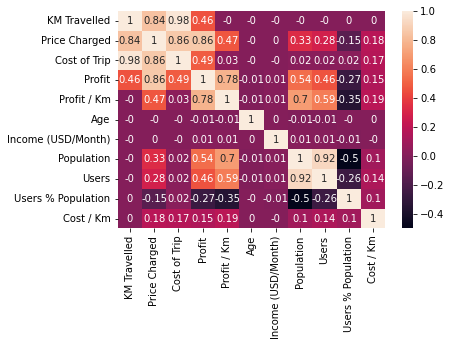

In [41]:
# Producing a correlation table and rounding the results to 2 decimal places.
columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit / Km', 
           'Age', 'Income (USD/Month)', 'Population', 'Users', 'Users % Population', 'Cost / Km']

correlations = dataset[columns].corr().round(2)

sns.heatmap(correlations, annot = True)

We can see from the above correlation heatmap the below observations:

* Cost of Trip correlates almost perfectly with the KM Travelled at 0.98, but Price Charged correlates less strongly (0.84) with the KM Travelled, which implies that that for longer trips, we have reduced profitability, and we can see this reflected by the weak correlation value of 0.46 between profit and KM Travelled and negative weak correlation of KM Travelled with 'Profit / Km' (-0). This warrants further investigation to see which company is less efficient for longer trips.

* We can see that profit values have a moderate corellation (0.54) with the size of the population of a city, and a slightly weaker corellation with the number of registered Cab users in a city. We can conclude that larger cities are generally more profitable than smaller cities. We can further check which companies take are more profitable in the bigger cities.

* An interesting observation is that 'Profit / Km' has a strong correlation (0.7) with the size of the population of a city and a slightly smaller but still significant correlation with the number of registered users in a city at 0.59.

* We can also see that the % of registered cab users in a city is moderately negatively correlated (-0.5) with the size of the population, so we can infer that larger cities have a smaller % of their population as registerred Cab users.

#### Aggregating the data by company to determine the size of each company:

In [42]:
# Grouping by company and checking the mean of below features:
# Other features were removed because they are repeated values.
columns = ['Company', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Profit / Km', 'Cost / Km']

agg_data =  dataset[columns].groupby(['Company']).mean().round(2)

agg_data.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km
Company,,,,,,
Pink Cab,22.56,310.80,248.15,62.65,2.77,11.0
Yellow Cab,22.57,458.18,297.92,160.26,7.11,13.2


array([[<AxesSubplot:title={'center':'KM Travelled'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Price Charged'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Cost of Trip'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Profit'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Profit / Km'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Cost / Km'}, xlabel='Company'>]],
      dtype=object)

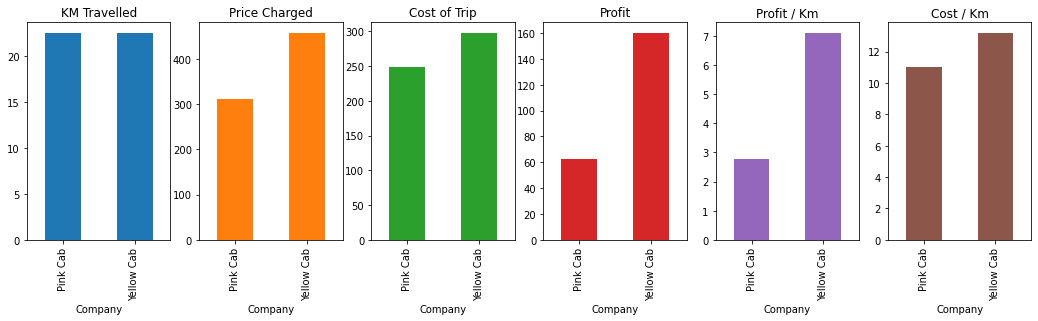

In [43]:
agg_data.plot(kind='bar', subplots=True, figsize=(18,4), layout=(1,6), legend=False)

1 - We can see that both companies cover roughly an average of 22.6km per trip

2 - Average charge per trip for yellow cab is 458 while average charge per trip of pink cab is 310 - which is a big difference

3 - Average cost per trip was also higher for yellow cab (297) compared to average cost for pink cab of 248

4 - Average profit is much higher for yellow cab at 160 vs 62 for pink cab

5- Average profit per km is much greater for yellow cab at 7.1$  vs  2.7$ for pink cab as expected.

6 - Average cost per km is lower for pink cab at 11$ per km vs  as expected from point 3 above.

* We can see from the first set of visualizations that yellow cab is much more profitable than pink cab company despite pink cab being more efficient and having lower cost per trip than yellow cab.

* Yellow cab is more than twice as profitable as pink cab on average per trip and per km travelled.

#### Checking number of trips per company in the 3 years 

Company
Pink Cab       84710
Yellow Cab    274674
Name: Transaction ID, dtype: int64


<AxesSubplot:title={'center':'Total Company Trips'}, xlabel='Company', ylabel=' Number of Trips'>

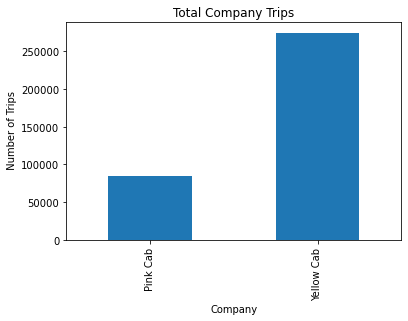

In [44]:
# Checking numer of trips per company:

company_trips = dataset.groupby(['Company'])['Transaction ID'].count()

print(company_trips.head())

company_trips.plot(kind='bar', title='Total Company Trips', ylabel=' Number of Trips')

* Yellow Cab Company has more than 3 times total trips as Pink Cab.

#### Checking Total profit and KM covered for each company over 3 years.

In [45]:
company_profit_and_distance = dataset.groupby(['Company'])[['KM Travelled', 'Profit']].sum().round(2)

company_profit_and_distance

,KM Travelled,Profit
Company,,
Pink Cab,1911036.73,5307259.07
Yellow Cab,6199216.83,44019262.84


array([[<AxesSubplot:title={'center':'KM Travelled'}, xlabel='Company'>,
        <AxesSubplot:title={'center':'Profit'}, xlabel='Company'>]],
      dtype=object)

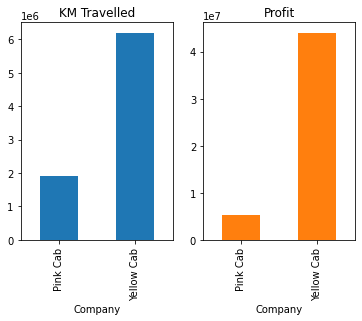

In [46]:
company_profit_and_distance.plot(kind='bar', subplots=True, layout=(1,2), figsize=(6,4), legend=False)



* Yellow Cab company has conducted more than 3 times the number of trips as pink cab company with 27.4K trips for yellow cab vs 8.4K trips for pink cab.

* Total km travelled for yellow cab company more than 3 times the total km covered by pink cab company, with 6,199,216 km covered by yellow cab vs 1,911,036 km for pink cab company.

* Yellow cab company generated 8.29 times the profit of pink cab company over the 3 year period - with yellow cab generating 44 million dollars in profit vs 5.3 million dollars generated by pink cab company over the same period.

We can see that Yellow cab company is running a much larger operation compared to pink cab company with more than 3 times the trips, 3 times the total distance covered, and 8.3 times the profit, compared to pink cab company, over a 3 year period.

### Investigating some features to determine company specific operational trends:

#### Checking payment modes and how much of each mode is utilized by each company.

In [47]:
payment_mode = dataset.groupby(['Company', 'Payment_Mode'])['Payment_Mode'].count()

payment_mode.head()

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33991
Yellow Cab  Card            164781
            Cash            109893
Name: Payment_Mode, dtype: int64

* Both companies receive roughly 40% of their payments in cash while the rest is received via card payment.

In [48]:
# Calculating the number of unique users who used each company during the 3 year period:
company_users = dataset.groupby(['Company'])['Customer ID'].unique().apply(lambda x: len(x))

company_users

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

In [49]:
# Comparing above against total unique customer IDs in the whole dataset:
len(dataset['Customer ID'].unique())

46148

Pink cab has served approximately 70% of the total users included in our dataset

Yellow cab has served approximately 86% of the total users included in our dataset

It must be noted that many customers used services from both companies.

#### Checking how many times on average each user used both companies, as well as the maximum number of trips by a user of each:

In [50]:
# Getting the average trips per user for each cab company:
avg_trips_peruser = dataset.groupby(['Company', 'Customer ID'])[['Transaction ID']].count().groupby(['Company']).mean()

avg_trips_peruser

,Transaction ID
Company,
Pink Cab,2.620167
Yellow Cab,6.884750


<AxesSubplot:title={'center':'Average Trips per User'}, xlabel='Company', ylabel='Average number of Trips'>

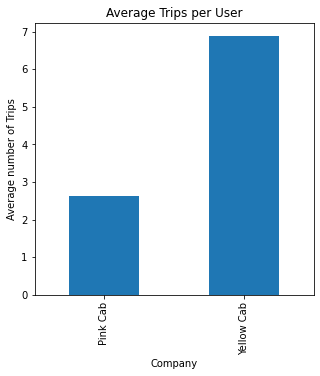

In [51]:
avg_trips_peruser.plot(kind='bar', legend=False, figsize=(5,5), title='Average Trips per User', ylabel='Average number of Trips')

In [52]:
# Getting the highest number of trips for a single user for each company:
max_trips_peruser = dataset.groupby(['Company', 'Customer ID'])[['Transaction ID']].count().groupby(['Company']).max()

max_trips_peruser

,Transaction ID
Company,
Pink Cab,18
Yellow Cab,47


<AxesSubplot:title={'center':'Maximum number of Trips by single user'}, xlabel='Company', ylabel='Amount of Trips'>

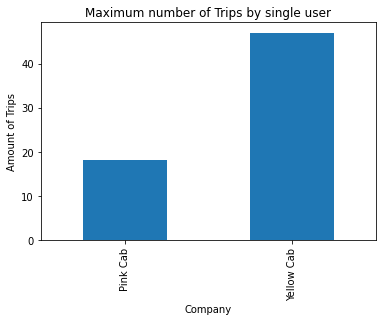

In [53]:
max_trips_peruser.plot(kind='bar', legend=False, title='Maximum number of Trips by single user', ylabel='Amount of Trips')

1- We can see from the results above that throughout the 3 year period, each pink cab customer used pink cab an average of 2.6 times. For the same 3 year period, each yellow cab customer used yellow cab 6.88 times on average.

2- The maximum number of trips for pink cab by a single customer is 18 trips, while the maximum number of trips by yellow cab for a single customer is 47.

* We can conclude that Yellow Cab has much higher customer loyalty and their customers use their services much more often.

* We can start to make conclusions about the quality of service of yellow cab being much higher than pink cab and users prefer using yellow cab in general.

#### Checking the number of cities coverred by each cab company:

In [54]:
# Checking number of cities covered by each company:
cities_covered = dataset.groupby(['Company', 'City'])[['City']].count().groupby(['Company']).count()

cities_covered

,City
Company,
Pink Cab,19
Yellow Cab,19


#### Checking company profit by Quarter:

In [55]:
# Sorting our dataset by date - date sorted data
ds_data = dataset.sort_values(by='Date of Travel')

ds_data = ds_data.reset_index(drop=True)

In [56]:
ds_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Users % Population
0,10001001,2016-01-04,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,17.021667,12.72,2761,Card,Male,40,11462,8405837,302149,3.594514
1,10000519,2016-01-04,Yellow Cab,CHICAGO IL,13.92,327.23,185.4144,141.8156,10.187902,13.32,4429,Cash,Male,20,23387,1955130,164468,8.412126
2,10000356,2016-01-04,Pink Cab,SEATTLE WA,14.95,171.47,171.9250,-0.4550,-0.030435,11.50,38635,Card,Male,31,24682,671238,25063,3.733847
3,10000357,2016-01-04,Pink Cab,SEATTLE WA,20.52,259.13,244.1880,14.9420,0.728168,11.90,38494,Card,Male,33,33892,671238,25063,3.733847
4,10001328,2016-01-04,Yellow Cab,WASHINGTON DC,19.38,439.58,272.0952,167.4848,8.642147,14.04,51745,Cash,Male,27,15072,418859,127001,30.320705


In [57]:
ds_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Users % Population
359379,10434824,2019-01-02,Yellow Cab,LOS ANGELES CA,33.35,566.17,412.2060,153.9640,4.616612,12.36,7302,Card,Male,37,26726,1595037,144132,9.036279
359380,10439214,2019-01-02,Yellow Cab,NEW YORK NY,12.60,276.52,172.3680,104.1520,8.266032,13.68,1568,Cash,Female,34,2799,8405837,302149,3.594514
359381,10434955,2019-01-02,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,88.3948,4.721944,14.16,7207,Card,Male,26,8194,1595037,144132,9.036279
359382,10434224,2019-01-02,Yellow Cab,BOSTON MA,30.07,446.61,433.0080,13.6020,0.452345,14.40,58956,Card,Male,39,24646,248968,80021,32.141078
359383,10436538,2019-01-02,Yellow Cab,WASHINGTON DC,8.91,133.55,115.4736,18.0764,2.028777,12.96,51137,Cash,Male,33,14492,418859,127001,30.320705


In [58]:
# Change date to datetime format for grouper object to work
ds_data['Date of Travel'] = pd.to_datetime(ds_data['Date of Travel'])

profit_by_month = ds_data.groupby(['Company', pd.Grouper(key='Date of Travel', 
                                                        freq='Q')])[['Profit']].sum().round(2)

# Plotting both companies profits accross 3 years and removing 
#the last reading from both of the first 2 days of jan 2019
pbm_pink = profit_by_month.loc['Pink Cab'].iloc[:-1,:]
pbm_yellow = profit_by_month.loc['Yellow Cab'].iloc[:-1,:]

[Text(0, 0, '2016 Q1'),
 Text(1, 0, '2016 Q2'),
 Text(2, 0, '2016 Q3'),
 Text(3, 0, '2016 Q4'),
 Text(4, 0, '2017 Q1'),
 Text(5, 0, '2017 Q2'),
 Text(6, 0, '2017 Q3'),
 Text(7, 0, '2017 Q4'),
 Text(8, 0, '2018 Q1'),
 Text(9, 0, '2018 Q2'),
 Text(10, 0, '2018 Q3'),
 Text(11, 0, '2018 Q4')]

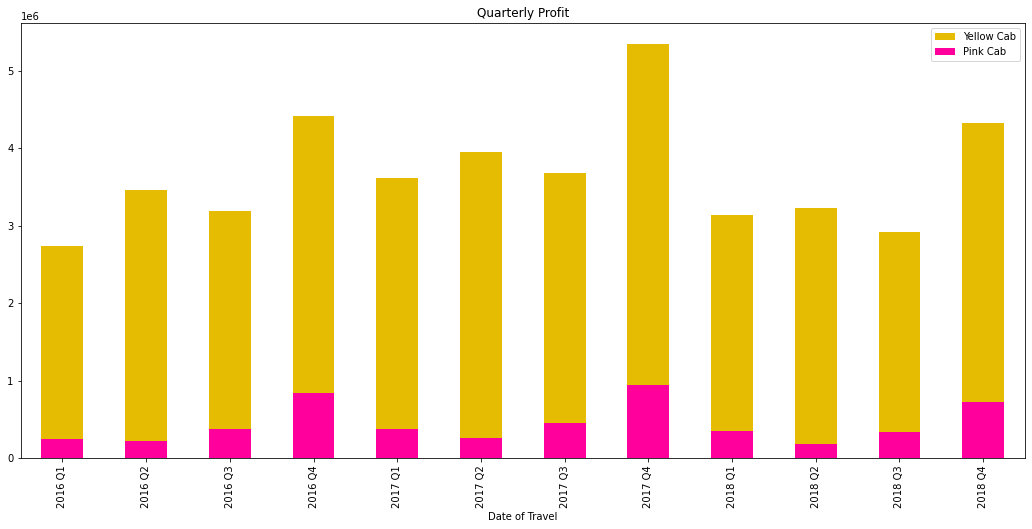

In [59]:
ax = pbm_yellow.plot(kind='bar', color='#e6bc02')
pbm_pink.plot(kind='bar', ax=ax, color='#ff009d', figsize=(18,8), title='Quarterly Profit')
ax.legend(['Yellow Cab', 'Pink Cab'])
ax.set_xticklabels(['2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4', 
                    '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', 
                    '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4'])

* We can see that the quartery profit of Yellow Cab is always much higher than pink cab.

* for quarter 2 of every year, Yellow Cab profits increase while Pink Cab profits decrease

* for quarter 3 of every year Yellow Cab profits decrease while Pink Cab profits increase

* The best quarter of each year for both companies' profits are Q4

* the second best quarter for Yellow cab every year is Q2, while the second best quarter for Pink Cab Company is Q3.

#### Checking Profit by Year

In [60]:
profit_by_year = ds_data.groupby(['Company', pd.Grouper(key='Date of Travel', freq='Y')])[['Profit']].sum().round(2)

# Generating a dataframe for each company's yearly profits and removing the last entry which is 2 days of 2019
pby_yellow = profit_by_year.loc['Yellow Cab'].iloc[:-1,:]
pby_pink = profit_by_year.loc['Pink Cab'].iloc[:-1,:]

profit_by_year

Profit
Company    Date of Travel             
Pink Cab   2016-12-31       1686457.51
           2017-12-31       2033435.13
           2018-12-31       1578903.21
           2019-12-31          8463.21
Yellow Cab 2016-12-31      13786549.64
           2017-12-31      16585986.73
           2018-12-31      13609364.80
           2019-12-31         37361.68

C:\Users\xcomr\AppData\Local\Temp/ipykernel_14968/932682982.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M'])


[Text(0, 0.0, ''),
 Text(0, 2000000.0, '2M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 6000000.0, '6M'),
 Text(0, 8000000.0, '8M'),
 Text(0, 10000000.0, '10M'),
 Text(0, 12000000.0, '12M'),
 Text(0, 14000000.0, '14M'),
 Text(0, 16000000.0, '16M'),
 Text(0, 18000000.0, '18M')]

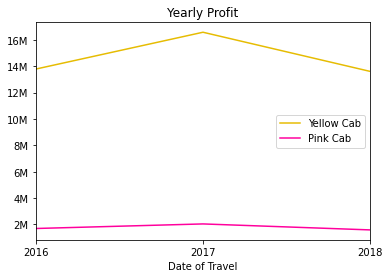

In [61]:
ax = pby_yellow.plot(kind='line', color='#e6bc02')
pby_pink.plot(kind='line', ax=ax, color='#ff009d', figsize=(6,4), title='Yearly Profit')
ax.legend(['Yellow Cab', 'Pink Cab'])
ax.set_yticklabels(['', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M'])

* We can see that 2017 was the most profitable year for both companies, out of the 3 years in the dataset.

* Pink Cab increased their profit by roughly 20% in 2017 compared to the previous year, but their profit decreased by roughly 23% in 2018 compared to the previous year.

* Yellow Cab also increased their profit by roughly 20% in 2017 compared to previous year, but their profit decreased by roughly 18% in 2018 compared to the previous year, which is a better percentage compared to Pink Cab.

#### Checking percentage profit by age group:

In [62]:
ds_data['Age'].min()

18

In [63]:
ds_data['Age'].max()

65

In [64]:
# Creating a new feature - age group
def age_cat(a):
    if a >= 18 and a < 26:
        return '18-25'
    elif a >= 26 and a < 36:
        return '26-35'
    elif a >= 36 and a < 46:
        return '36-45'
    elif a >= 46 and a < 56:
        return '46-55'
    else:
        return '56 and above'
    
ds_data['Age Group'] = ds_data['Age'].apply(age_cat)

ds_data  

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Users % Population,Age Group
0,10001001,2016-01-04,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,17.021667,12.72,2761,Card,Male,40,11462,8405837,302149,3.594514,36-45
1,10000519,2016-01-04,Yellow Cab,CHICAGO IL,13.92,327.23,185.4144,141.8156,10.187902,13.32,4429,Cash,Male,20,23387,1955130,164468,8.412126,18-25
2,10000356,2016-01-04,Pink Cab,SEATTLE WA,14.95,171.47,171.9250,-0.4550,-0.030435,11.50,38635,Card,Male,31,24682,671238,25063,3.733847,26-35
3,10000357,2016-01-04,Pink Cab,SEATTLE WA,20.52,259.13,244.1880,14.9420,0.728168,11.90,38494,Card,Male,33,33892,671238,25063,3.733847,26-35
4,10001328,2016-01-04,Yellow Cab,WASHINGTON DC,19.38,439.58,272.0952,167.4848,8.642147,14.04,51745,Cash,Male,27,15072,418859,127001,30.320705,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359379,10434824,2019-01-02,Yellow Cab,LOS ANGELES CA,33.35,566.17,412.2060,153.9640,4.616612,12.36,7302,Card,Male,37,26726,1595037,144132,9.036279,36-45
359380,10439214,2019-01-02,Yellow Cab,NEW YORK NY,12.60,276.52,172.3680,104.1520,8.266032,13.68,1568,Cash,Female,34,2799,8405837,302149,3.594514,26-35
359381,10434955,2019-01-02,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,88.3948,4.721944,14.16,7207,Card,Male,26,8194,1595037,144132,9.036279,26-35
359382,10434224,2019-01-02,Yellow Cab,BOSTON MA,30.07,446.61,433.0080,13.6020,0.452345,14.40,58956,Card,Male,39,24646,248968,80021,32.141078,36-45


<AxesSubplot:title={'center':'Pink Cab - Profit by Age Group'}, xlabel='Age Group', ylabel='Percent of Profit'>

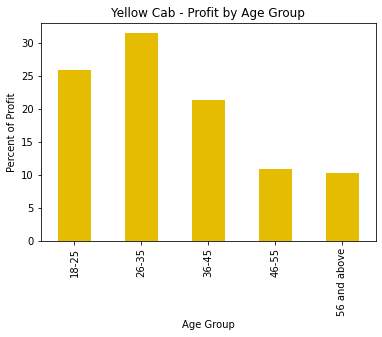

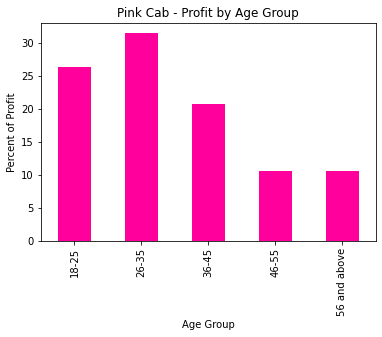

In [65]:
profit_by_age = ds_data.groupby(['Company', 'Age Group'])[['Profit']].sum().round(2)

#profit percent by age for each company
ppba_yellow = (profit_by_age.loc['Yellow Cab'] / profit_by_age.loc['Yellow Cab'].sum())*100
ppba_pink = (profit_by_age.loc['Pink Cab'] / profit_by_age.loc['Pink Cab'].sum())*100

ppba_yellow.plot(kind='bar', legend=False, color='#e6bc02', 
                 title='Yellow Cab - Profit by Age Group', ylabel='Percent of Profit')
ppba_pink.plot(kind='bar', legend=False, color='#ff009d', 
               title='Pink Cab - Profit by Age Group', ylabel='Percent of Profit')

* We can see that both cab companies share a very similar distribution of their profit accross their users' age groups.

* The biggest age group contributing to both companyies' profits are the 26-35 age group, followed by the 18-25 age group and then by the 36-45 age group.

* Users below 46 years old account for roughly 75% of the profit of both cab companies.

#### Checking percentage profit by income bracket:

In [66]:
ds_data['Income (USD/Month)'].min()

2000

In [67]:
ds_data['Income (USD/Month)'].max()

35000

In [68]:
# Creating new feature - profit percentage per trip, per company:
total_profit_yellow = company_profit_and_distance.loc['Yellow Cab', 'Profit']
total_profit_pink = company_profit_and_distance.loc['Pink Cab', 'Profit']

def percent_income_by_company(row):
    if row['Company'] == 'Yellow Cab':
        return (row['Profit'] / total_profit_yellow)*100
    elif row['Company'] == 'Pink Cab':
        return (row['Profit'] / total_profit_pink)*100
    
ds_data['% Profit of Company Total'] = ds_data.apply(percent_income_by_company, axis=1)

In [69]:
# Creating new feature - Income Group:
def income_group(row):
    income = row['Income (USD/Month)']
    if income >=0 and income <=8000:
        return '0-8000'
    elif income > 8000 and income <=16000:
        return '8001-16000'
    elif income > 16000 and income <= 24000:
        return '16001-24000'
    elif income > 24000 and income <= 32000:
        return '24001-32000'
    elif income > 32000 and income <= 40000:
        return '32001-40000'
    
ds_data['Income Group'] = ds_data.apply(income_group, axis=1)

ds_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit / Km,Cost / Km,...,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Users % Population,Age Group,% Profit of Company Total,Income Group
0,10001001,2016-01-04,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,17.021667,12.72,...,Card,Male,40,11462,8405837,302149,3.594514,36-45,0.001810,8001-16000
1,10000519,2016-01-04,Yellow Cab,CHICAGO IL,13.92,327.23,185.4144,141.8156,10.187902,13.32,...,Cash,Male,20,23387,1955130,164468,8.412126,18-25,0.000322,16001-24000
2,10000356,2016-01-04,Pink Cab,SEATTLE WA,14.95,171.47,171.9250,-0.4550,-0.030435,11.50,...,Card,Male,31,24682,671238,25063,3.733847,26-35,-0.000009,24001-32000
3,10000357,2016-01-04,Pink Cab,SEATTLE WA,20.52,259.13,244.1880,14.9420,0.728168,11.90,...,Card,Male,33,33892,671238,25063,3.733847,26-35,0.000282,32001-40000
4,10001328,2016-01-04,Yellow Cab,WASHINGTON DC,19.38,439.58,272.0952,167.4848,8.642147,14.04,...,Cash,Male,27,15072,418859,127001,30.320705,26-35,0.000380,8001-16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359379,10434824,2019-01-02,Yellow Cab,LOS ANGELES CA,33.35,566.17,412.2060,153.9640,4.616612,12.36,...,Card,Male,37,26726,1595037,144132,9.036279,36-45,0.000350,24001-32000
359380,10439214,2019-01-02,Yellow Cab,NEW YORK NY,12.60,276.52,172.3680,104.1520,8.266032,13.68,...,Cash,Female,34,2799,8405837,302149,3.594514,26-35,0.000237,0-8000
359381,10434955,2019-01-02,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,88.3948,4.721944,14.16,...,Card,Male,26,8194,1595037,144132,9.036279,26-35,0.000201,8001-16000
359382,10434224,2019-01-02,Yellow Cab,BOSTON MA,30.07,446.61,433.0080,13.6020,0.452345,14.40,...,Card,Male,39,24646,248968,80021,32.141078,36-45,0.000031,24001-32000


% Profit of Company Total
Company    Income Group                           
Pink Cab   0-8000                            23.31
           8001-16000                        31.30
           16001-24000                       32.01
           24001-32000                       10.52
           32001-40000                        2.86
Yellow Cab 0-8000                            22.83
           8001-16000                        31.76
           16001-24000                       32.20
           24001-32000                       10.48
           32001-40000                        2.73

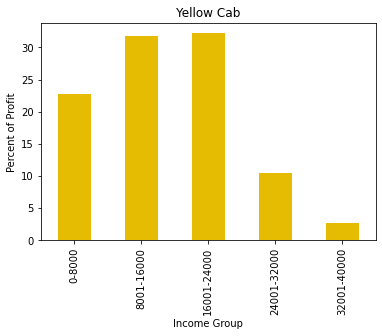

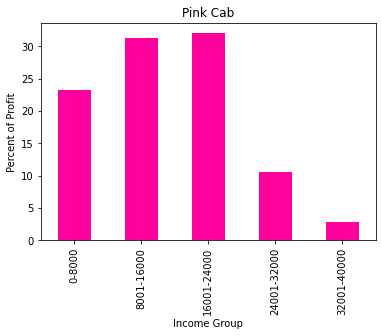

In [70]:
profit_by_income = ds_data.groupby(['Company', 'Income Group'])[['% Profit of Company Total']].sum().round(2)

sorted_index = [('Pink Cab', '0-8000'),('Pink Cab', '8001-16000'),('Pink Cab', '16001-24000'),
                ('Pink Cab', '24001-32000'),('Pink Cab', '32001-40000'),
               ('Yellow Cab', '0-8000'),('Yellow Cab', '8001-16000'),('Yellow Cab', '16001-24000'),
                ('Yellow Cab', '24001-32000'),('Yellow Cab', '32001-40000')]

pbi = profit_by_income.loc[sorted_index]

pbi.loc['Yellow Cab'].plot(kind='bar', color='#e6bc02', legend=False, title='Yellow Cab', ylabel='Percent of Profit')
pbi.loc['Pink Cab'].plot(kind='bar', color='#ff009d', legend=False, title='Pink Cab', ylabel='Percent of Profit')

pbi

* We can see from our analysis that both companies have almost identical user income segments, the user income segments with the highest contribution to profit are the 16k-24k and then the 8k-16k income brackets, and then the users with an income of 0-8k, together these 3 give us around 86% of the profit for each company.

In [71]:
# Saving Final dataset as CSV file
ds_data.to_csv('Final Data.csv')

# Summary, Analysis and Conclusion:

This analysis was conducted to determine which Cab company, Yellow or Pink, is the correct choice for investment by XYZ company.

Given information:

1- Cab_Data.csv – this file includes details of transaction for 2 cab companies

2- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

3- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

4- City.csv – this file contains list of US cities, their population and number of cab users

5- Given information is the data was collected from 2016.1.31 till 2018.12.31 - this is 3 years minus almost 1 month, but the true range of the data was from 2016.1.4 till 2nd 2019.1.2 .

#### Data Preparation and Generated Features:
After reading in the datasets:
* Cab data was found to contain 8 duplicated entries(when we don't take Transaction IDs into account) and they were dropped.
* In Cities data, Population and Users column had to be converted from text to int.
* 6 features were created for the various analysis performed:

    1- Profit/KM - to determine Profit per distance for each trip
    
    2- Cost/KM - to determine Cost per distance for each trip
    
    3- Users % Population - to determine the percentage of the population of each city that are registered users
    
    4- Age Group - to divide the age of users into 5 groups and analyze by age group.
    
    5- % Profit of Company Total - the percentage of profit of each trip of the total company profit
    
    6- Income Group - to divide the users into 5 income groups and analyze by income group.


#### Correllation Study and Heatmap:
We can see from the above correlation heatmap the below observations:

* Cost of Trip correlates almost perfectly with the KM Travelled at 0.98, but Price Charged correlates less strongly (0.84) with the KM Travelled, which implies that that for longer trips, we have reduced profitability, and we can see this reflected by the weak correlation value of 0.46 between profit and KM Travelled and negative weak correlation of KM Travelled with 'Profit / Km' (-0). This warrants further investigation to see which company is less efficient for longer trips.

* We can see that profit values have a moderate corellation (0.54) with the size of the population of a city, and a slightly weaker corellation with the number of registered Cab users in a city. We can conclude that larger cities are generally more profitable than smaller cities. We can further check which companies take are more profitable in the bigger cities.

* An interesting observation is that 'Profit / Km' has a strong correlation (0.7) with the size of the population of a city and a slightly smaller but still significant correlation with the number of registered users in a city at 0.59.

* We can also see that the % of registered cab users in a city is moderately negatively correlated (-0.5) with the size of the population, so we can infer that larger cities have a smaller % of their population as registerred Cab users.

#### Aggregating the data by company to determine the size of each company:
1 - We can see that both companies cover roughly an average of 22.6km per trip

2 - Average charge per trip for yellow cab is 458 while average charge per trip of pink cab is 310 - which is a big difference

3 - Average cost per trip was also higher for yellow cab (297) compared to average cost for pink cab of 248

4 - Average profit is much higher for yellow cab at 160 vs 62 for pink cab

5- Average profit per km is much greater for yellow cab at $7.1  vs  $2.7 for pink cab as expected.

6 - Average cost per km is lower for pink cab at 11$ per km vs  as expected from point 3 above.

* We can see from the first set of visualizations that yellow cab is much more profitable than pink cab company despite pink cab being more efficient and having lower cost per trip than yellow cab.

* Yellow cab is more than twice as profitable as pink cab on average per trip and per km travelled.

#### Checking number of trips per company in the 3 years 
* Yellow Cab Company has more than 3 times total trips as Pink Cab.

#### Checking Total profit and KM covered for each company over 3 years.
* Yellow Cab company has conducted more than 3 times the number of trips as pink cab company with 27.4K trips for yellow cab vs 8.4K trips for pink cab.

* Total km travelled for yellow cab company more than 3 times the total km covered by pink cab company, with 6,199,216 km covered by yellow cab vs 1,911,036 km for pink cab company.

* Yellow cab company generated 8.29 times the profit of pink cab company over the 3 year period - with yellow cab generating 44 million dollars in profit vs 5.3 million dollars generated by pink cab company over the same period.

We can see that Yellow cab company is running a much larger operation compared to pink cab company with more than 3 times the trips, 3 times the total distance covered, and 8.3 times the profit, compared to pink cab company, over a 3 year period.

#### Checking payment modes and how much of each mode is utilized by each company.
* Both companies receive roughly 40% of their payments in cash while the rest is received via card payment.


#### Checking percentage of total users in our dataset served by each company.
* Pink cab has served approximately 70% of the total users included in our dataset

* Yellow cab has served approximately 86% of the total users included in our dataset

* It must be noted that many customers used services from both companies.

#### Checking how many times on average each user used both companies, as well as the maximum number of trips by a user of each:
1- We can see from the results above that throughout the 3 year period, each pink cab customer used pink cab an average of 2.6 times. For the same 3 year period, each yellow cab customer used yellow cab 6.88 times on average.

2- The maximum number of trips for pink cab by a single customer is 18 trips, while the maximum number of trips by yellow cab for a single customer is 47.

* We can conclude that Yellow Cab has much higher customer loyalty and their customers use their services much more often.

* We can start to make conclusions about the quality of service of yellow cab being much higher than pink cab and users prefer using yellow cab in general.

#### Checking company profit by Quarter:
* We can see that the quartery profit of Yellow Cab is always much higher than pink cab.

* for quarter 2 of every year, Yellow Cab profits increase while Pink Cab profits decrease

* for quarter 3 of every year Yellow Cab profits decrease while Pink Cab profits increase

* The best quarter of each year for both companies' profits are Q4

* the second best quarter for Yellow cab every year is Q2, while the second best quarter for Pink Cab Company is Q3.

#### Checking Profit by Year
* We can see that 2017 was the most profitable year for both companies, out of the 3 years in the dataset.

* Pink Cab increased their profit by roughly 20% in 2017 compared to the previous year, but their profit decreased by roughly 23% in 2018 compared to the previous year.

* Yellow Cab also increased their profit by roughly 20% in 2017 compared to previous year, but their profit decreased by roughly 18% in 2018 compared to the previous year, which is a better percentage compared to Pink Cab.

#### Checking percentage profit by age group:
* We can see that both cab companies share a very similar distribution of their profit accross their users' age groups.

* The biggest age group contributing to both companyies' profits are the 26-35 age group, followed by the 18-25 age group and then by the 36-45 age group.

* Users below 46 years old account for roughly 75% of the profit of both cab companies.

#### Checking percentage profit by income bracket:

We can see from our analysis that both companies have almost identical user income segments, the user income segments with the highest contribution to profit are the 16k-24k and then the 8k-16k income brackets, and then the users with an income of 0-8k, together these 3 give us around 86% of the profit for each company.